# Discrete Fourier Transform

In [2]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt
from IPython.display import Audio
plt.rcParams["figure.figsize"]=(15,4) # Set default figure size

## Examples of sinusoids

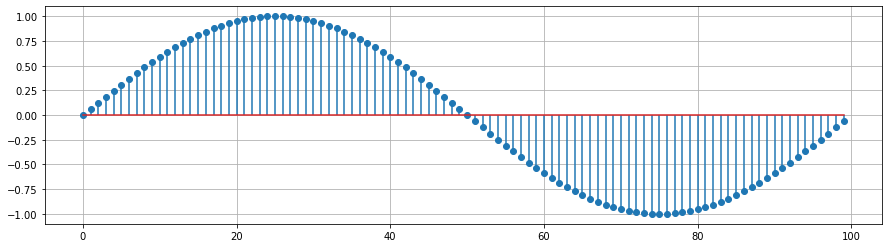

In [3]:
N = 100
k = 1
A = 1
n = np.arange(0,N)
phi = -np.pi/2
x = A*np.cos(2*np.pi*k*n/N + phi)
plt.stem(x,use_line_collection=True)
plt.grid(True); plt.show();

## Compute FFT

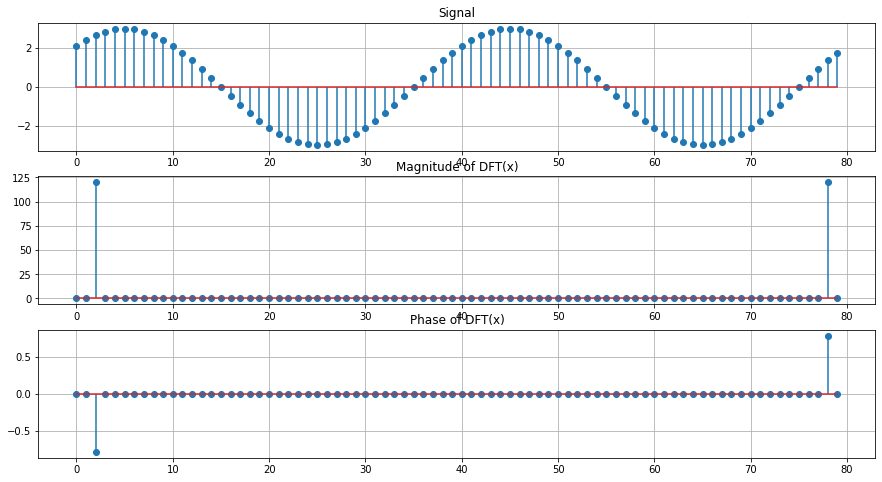

In [11]:
N = 80
k = 2
A = 3
n = np.arange(0,N)
phi = -np.pi/4
x = A*np.cos(2*np.pi*k*n/N + phi)
y = np.fft.fft(x)

plt.figure(figsize=(15,8))
plt.subplot(3,1,1)
plt.stem(x,use_line_collection=True)
plt.title('Signal'); plt.grid(True);

plt.subplot(3,1,2)
plt.stem(np.abs(y),use_line_collection=True)
plt.title('Magnitude of DFT(x)'); plt.grid(True);

plt.subplot(3,1,3)
y_angle = np.angle(y)
y_angle[np.abs(y) < 1e-12] = 0
plt.stem(y_angle,use_line_collection=True)
plt.title('Phase of DFT(x)'); plt.grid(True);

plt.show();

## Play audio signal

In [13]:
N = 44100
k1 = 500; k2 = 750; k3 = 1100;
n = np.arange(0,N)
x = sum([np.cos(2*np.pi*k*n/N) for k in [k1,k2,k3]])
Audio(x,rate=N)

## Filtering

#### Idea
Let us assume we have some data that is distorted by a lot of noise. By filtering we want to get rid of the noise and see the data that is distorted by the noise more clearly 

![title](img/idealfilter.png)

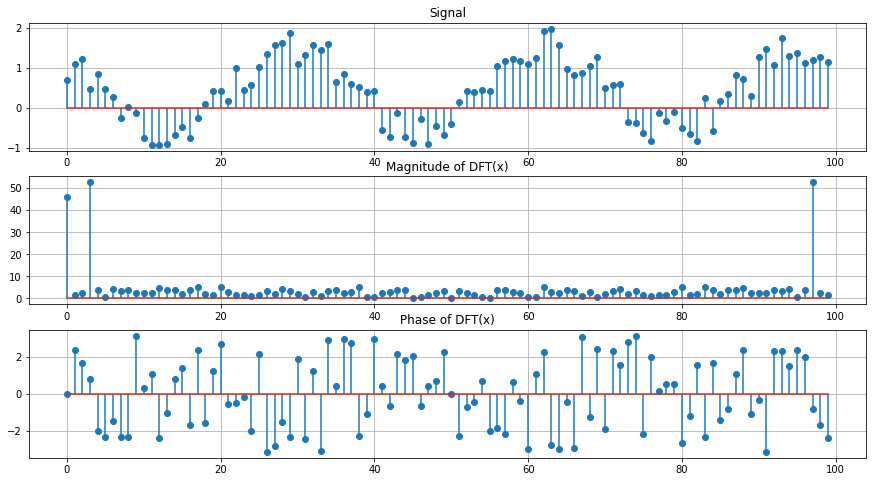

In [14]:
N = 100
k = 3
n = np.arange(0,N)
phi = np.pi/4
x = np.cos(2*np.pi*k*n/N + phi) + np.random.random(N)
y = np.fft.fft(x)

plt.figure(figsize=(15,8))
plt.subplot(3,1,1)
plt.stem(x,use_line_collection=True)
plt.title('Signal'); plt.grid(True);

plt.subplot(3,1,2)
plt.stem(np.abs(y),use_line_collection=True)
plt.title('Magnitude of DFT(x)'); plt.grid(True);

plt.subplot(3,1,3)
y_angle = np.angle(y)
y_angle[np.abs(y) < 1e-12] = 0
plt.stem(y_angle,use_line_collection=True)
plt.title('Phase of DFT(x)'); plt.grid(True);

plt.show();

Filtering can for example be achieved by 'zeroing' all the data in the DFT lower than some fixed value. This is called a low pass filter.

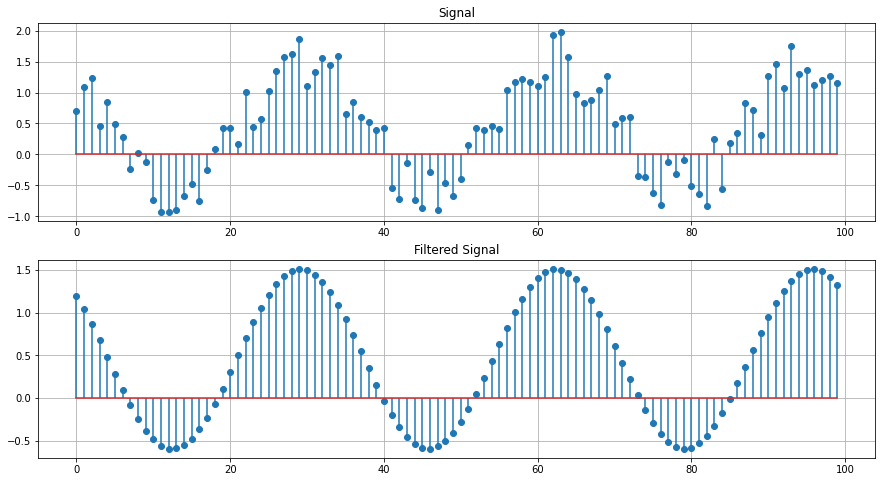

In [15]:
y_filtered = y.copy()
y_filtered[y < 10] = 0.0
plt.figure(figsize=(15,8))
x_filtered = np.fft.ifft(y_filtered).real

plt.subplot(2,1,1)
plt.stem(x,use_line_collection=True)
plt.title('Signal'); plt.grid(True);

plt.subplot(2,1,2)
plt.stem(x_filtered,use_line_collection=True)
plt.title('Filtered Signal'); plt.grid(True);

plt.show();

### Four common filters.

1. Low-pass filter, passes signals with a frequency lower than a certain cutoff frequency and attenuates signals with frequencies higher than the cutoff frequency.
2. High-pass filter, passes signals with a frequency higher than a certain cutoff frequency and attenuates signals with frequencies lower than the cutoff frequency.
3. A band-pass filter can be formed by cascading a high-pass filter and a low-pass filter.
4. A band-reject filter is a parallel combination of low-pass and high-pass filters.

<table><tr>
<td> 
  <p align="center" style="padding: 10px">
    <img alt="LowPassFilter" src="img/lowpass.png" width="400">
  </p> 
</td>
<td> 
  <p align="center">
    <img alt="HighPassFilter" src="img/highpass.png" width="400">
  </p> 
</td>
</tr></table>
